#### Lilikoi: an R package of personalized metabolomics pathway analysis
#### Lilikoi is a novel tool for personalized pathway analysis of metabolomics data. 
#### It has four modules:
* feature mapper, dimension transformation, feature selection, and classification and prediction.
<img src="FIG1.JPG">

In [31]:
library(devtools)

## Data format: 
### User recommends to save their data in csv format. Columns are metabolites and rows are samples. Case and control label should be saved in the second column such as the below raw data:
#### Note: make sure to disable the check.names option in the read.csv

In [36]:
plasma_data_dir=system.file("extdata", "plasma_breast_cancer.csv", package = "lilikoi")
plasma_data=read.csv(plasma_data_dir,check.names=F,row.names=1)
head(plasma_data)
dim(plasma_data)
table(plasma_data$Label)

,Label,Asparagine,Hypotaurine,5-Oxoproline,Cysteine,Aspartate,Glycerolphosphate,Glycerophosphocholine,Glutamate,Glutamine,⋯,D-Glucuronic acid,Tetradecanoylcarnitine,a-Hydroxyisobutyric acid,L-Leucine,Carnitine,Cyclohexyloxy,Dodecanoylcarnitine,Creatine,Elaidic acid,o-Tyrosine
PN00506,Cancer,0.09211519,0.015607552,1.4384582,0.09545046,0.05862126,0.013007384,0.09467126,0.08597329,0.1998283,⋯,0.003882790,0.022665362,0.3755292,2.439328,0.007897827,0.7692582,0.04746359,0.3033538,0.004448686,0.1825662
PN00032,Cancer,0.09973670,0.009799671,0.6588595,0.10677437,0.02643142,0.012061316,0.19675399,0.03957823,0.2166030,⋯,0.004647794,0.006417936,0.7200045,2.357825,0.013058909,0.6130774,0.01453644,0.1906820,0.003061111,0.2036796
PN01613,Cancer,0.08264039,0.005909090,0.9643893,0.04526247,0.03348040,0.026729726,0.05674980,0.06436560,0.3026230,⋯,0.008211485,0.012544114,0.7035599,2.095919,0.026404741,0.6294949,0.03070484,0.1063044,0.029403400,0.1423214
PN00516,Cancer,0.13046063,0.008726064,1.1546124,0.10821156,0.04242535,0.010585494,0.07766378,0.05791242,0.3670933,⋯,0.006685058,0.016009324,0.4612104,4.596898,0.035797215,0.6410135,0.03402296,0.3302062,0.002296782,0.2816584
PN00528,Cancer,0.10382572,0.015073054,1.5226628,0.10142434,0.04957616,0.008734067,0.18039997,0.12564110,0.4705194,⋯,0.009539999,0.019837064,1.1060993,2.017713,0.038289854,0.6641017,0.03344980,0.2497729,0.023087571,0.2076592
PN00746,Cancer,0.04870613,0.008073503,1.0397869,0.09784539,0.03366923,0.012024970,0.07073499,0.18332951,0.3250621,⋯,0.004115928,0.022204168,1.0099742,3.707926,0.061546666,0.6507238,0.04224291,0.2448327,0.005317198,0.2182078


[1] 207 228


Cancer Normal 
   126     81 

## The above data set is the metabolomics cohort which  is composed of 126 breast cancer and 81 control plasma samples from City of Hope Hospital (COH) 
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4818393/

## I- Load the data using Lilikoi Loaddata function

In [37]:
Loaddata(file=system.file("extdata", "plasma_breast_cancer.csv", package = "lilikoi"))

,Label,Asparagine,Hypotaurine,5-Oxoproline,Cysteine,Aspartate,Glycerolphosphate,Glycerophosphocholine,Glutamate,Glutamine,⋯,D-Glucuronic acid,Tetradecanoylcarnitine,a-Hydroxyisobutyric acid,L-Leucine,Carnitine,Cyclohexyloxy,Dodecanoylcarnitine,Creatine,Elaidic acid,o-Tyrosine
PN00506,Cancer,0.09211519,0.015607552,1.4384582,0.09545046,0.05862126,0.013007384,0.09467126,0.08597329,0.1998283,⋯,0.003882790,0.022665362,0.3755292,2.439328,0.007897827,0.7692582,0.04746359,0.3033538,0.004448686,0.1825662
PN00032,Cancer,0.09973670,0.009799671,0.6588595,0.10677437,0.02643142,0.012061316,0.19675399,0.03957823,0.2166030,⋯,0.004647794,0.006417936,0.7200045,2.357825,0.013058909,0.6130774,0.01453644,0.1906820,0.003061111,0.2036796
PN01613,Cancer,0.08264039,0.005909090,0.9643893,0.04526247,0.03348040,0.026729726,0.05674980,0.06436560,0.3026230,⋯,0.008211485,0.012544114,0.7035599,2.095919,0.026404741,0.6294949,0.03070484,0.1063044,0.029403400,0.1423214
PN00516,Cancer,0.13046063,0.008726064,1.1546124,0.10821156,0.04242535,0.010585494,0.07766378,0.05791242,0.3670933,⋯,0.006685058,0.016009324,0.4612104,4.596898,0.035797215,0.6410135,0.03402296,0.3302062,0.002296782,0.2816584
PN00528,Cancer,0.10382572,0.015073054,1.5226628,0.10142434,0.04957616,0.008734067,0.18039997,0.12564110,0.4705194,⋯,0.009539999,0.019837064,1.1060993,2.017713,0.038289854,0.6641017,0.03344980,0.2497729,0.023087571,0.2076592
PN00746,Cancer,0.04870613,0.008073503,1.0397869,0.09784539,0.03366923,0.012024970,0.07073499,0.18332951,0.3250621,⋯,0.004115928,0.022204168,1.0099742,3.707926,0.061546666,0.6507238,0.04224291,0.2448327,0.005317198,0.2182078


## II- Transforms the metabolite names to the HMDB ids uisng Lilikoi MetaTOpathway function
### Lilikoi allows the user to input any kind of metabolite IDs including metabolites names ('name') along with synonyms, KEGG IDs ('kegg'), HMDB IDs ('hmdb') and PubChem IDs ('pubchem'). 
### if the metabolites have a standard names as ID, Lilikoi will match these names among 100 k saved database, if there are not any hits, Lilikoi will perform fuzzy matching to find the closest matching for this metabolite.
### The below flowchart will explain this matching process in more details.
<img src="matching.JPG">

In [5]:
Metabolite_pathway_table=MetaTOpathway('name')
head(Metabolite_pathway_table)

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Query,Match,HMDB,PubChem,KEGG,Comment,pathway
Oxaloacetate,Oxalacetic acid,HMDB00223,970,C00036,1,Alanine Metabolism
Arachidonic acid,Arachidonic acid,HMDB01043,444899,C00219,1,Alpha Linolenic Acid and Linoleic Acid Metabolism
Tetracosahexaenoic acid,Tetracosahexaenoic acid,HMDB02007,11792612,,1,Alpha Linolenic Acid and Linoleic Acid Metabolism
N-Acetylneuraminic acid,N-Acetylneuraminic acid,HMDB00230,445063,C19910,1,Amino Sugar Metabolism
Asparagine,L-Asparagine,HMDB00168,6267,C00152,1,Ammonia Recycling
Glutamine,L-Glutamine,HMDB00641,5961,C00064,1,Ammonia Recycling


## III- Transform metabolites into pathway using Pathifier algorithm
https://www.bioconductor.org/packages/release/bioc/html/pathifier.html
#### A specific pathway dysregulation score (PDS) is inferred to measure the abnormity for each sample in each pathway. For each pathway, the samples are mapped in a high dimensional principal component space and a principal curve is constructed along the samples and smoothed. The PDS score measures the distance from the projected dot along the curve to the centroid of normal samples (origin point of the curve).

In [6]:
PDSmatrix= PDSfun(Metabolite_pathway_table)

Loading required package: pathifier


robust_score_bydist. min_exp= 0 , min_std= 0 
pathway  1 > sig: 0.01060128 
pathway  2 > sig: 0.01060128 
skipping pathway  3  k1= 1 
pathway  4 > sig: 0.231045 
pathway  5 > sig: 0.06000226 
pathway  6 > sig: 0.01959031 
pathway  7 > sig: 0.04592979 
pathway  8 > sig: 0.01060128 
pathway  9 > sig: 0.01959031 
pathway  10 > sig: 0.01959031 
pathway  11 > sig: 0.01959031 
pathway  12 > sig: 0.01959031 
pathway  13 > sig: 0.01959031 
pathway  14 > sig: 0.01959031 
pathway  15 > sig: 0.01959031 
pathway  16 > sig: 0.231045 
skipping pathway  17  k1= 2 
skipping pathway  18  k1= 2 
pathway  19 > sig: 0.1280958 
pathway  19  k= 7 ( 7 ) wj= 4 >new sig: 0.1219056 x rejected
skipping pathway  20  k1= 0 
skipping pathway  21  k1= 0 
skipping pathway  22  k1= 0 
skipping pathway  23  k1= 1 
skipping pathway  24  k1= 2 
skipping pathway  25  k1= 0 
skipping pathway  26  k1= 0 
pathway  27 > sig: 0.1721073 
pathway  28 > sig: 0.1721073 
pathway  29 > sig: 0.1721073 
skipping pathway  30  k1= 0 
pa

### Using PDSfun, we generate a new matrix which has pathways as columns instead of metaboltes. 

In [38]:
head(t(PDSmatrix))
dim(t(PDSmatrix))

,11-beta-hydroxylase Deficiency (CYP11B1),17-alpha-hydroxylase Deficiency (CYP17),2-Hydroxyglutric Aciduria (D And L Form),2-ketoglutarate Dehydrogenase Complex Deficiency,2-Methyl-3-Hydroxybutryl CoA Dehydrogenase Deficiency,2-Oxocarboxylic Acid Metabolism,21-hydroxylase Deficiency (CYP21),3-Hydroxy-3-Methylglutaryl-CoA Lyase Deficiency,3-hydroxyisobutyric Acid Dehydrogenase Deficiency,3-hydroxyisobutyric Aciduria,⋯,UMP Synthase Deiciency (Orotic Aciduria),Urea Cycle,Ureidopropionase Deficiency,"Valine, Leucine And Isoleucine Biosynthesis","Valine, Leucine And Isoleucine Degradation",Warburg Effect,Xanthine Dehydrogenase Deficiency (Xanthinuria),Xanthinuria Type I,Xanthinuria Type II,Zellweger Syndrome
PN00506,0.18604990,0.18604990,0.5307182,0.9016448,0.4821535,0.7479977,0.18604990,0.4821535,0.4821535,0.4821535,⋯,0.0894873,0.4797445,0.5959985,0.8175311,0.4821535,0.1967212,0.5734638,0.5734638,0.5734638,0.4484760
PN00032,0.03147437,0.03147437,0.5205342,0.7380502,0.5036445,0.7889482,0.03147437,0.5036445,0.5036445,0.5036445,⋯,0.0965794,0.4304196,0.6192351,0.7418192,0.5036445,0.3166038,0.5869790,0.5869790,0.5869790,0.4125932
PN01613,0.39370329,0.39370329,0.5212707,0.6839063,0.5526229,0.6860112,0.39370329,0.5526229,0.5526229,0.5526229,⋯,0.1583071,0.4320307,0.5888967,0.3368568,0.5526229,0.1669025,0.5923808,0.5923808,0.5923808,0.3732709
PN00516,0.03694981,0.03694981,0.5407725,0.7137784,0.7243157,0.8786079,0.03694981,0.7243157,0.7243157,0.7243157,⋯,0.2128603,0.4537374,0.6026904,0.5273254,0.7243157,0.2161873,0.6425271,0.6425271,0.6425271,0.4453892
PN00528,0.01004077,0.01004077,0.5802856,0.9236094,0.9189218,0.7693278,0.01004077,0.9189218,0.9189218,0.9189218,⋯,0.2251109,0.4818920,0.6448436,0.8207792,0.9189218,0.2507748,0.6598735,0.6598735,0.6598735,0.4318620
PN00746,0.13845402,0.13845402,0.5485456,0.7203340,0.6474588,0.7835988,0.13845402,0.6474588,0.6474588,0.6474588,⋯,0.1792055,0.4460532,0.5991568,0.4610154,0.6474588,0.1922873,0.6072885,0.6072885,0.6072885,0.5228511


[1] 207 244

## IV- Select the most signficant pathway related to phenotype.
### We used two methods for pathway selection which are implemented in Weka package:
https://cran.r-project.org/web/packages/RWeka/RWeka.pdf

* information gain ('info') and 
* gain ratio ('gain')

### If you did not get any selected pathwys, you can lower the threshold below 0.5

[1] "Adenine Phosphoribosyltransferase Deficiency (APRT)"
 [2] "Adenosine Deaminase Deficiency"                     
 [3] "Adenylosuccinate Lyase Deficiency"                  
 [4] "AICA-Ribosiduria"                                   
 [5] "Alanine, Aspartate And Glutamate Metabolism"        
 [6] "Aminoacyl-tRNA Biosynthesis"                        
 [7] "Ammonia Recycling"                                  
 [8] "Aspartate Metabolism"                               
 [9] "Azathioprine Action Pathway"                        
[10] "Canavan Disease"                                    
[11] "Gout Or Kelley-Seegmiller Syndrome"                 
[12] "Hypoacetylaspartia"                                 
[13] "Lesch-Nyhan Syndrome (LNS)"                         
[14] "Mercaptopurine Action Pathway"                      
[15] "Mitochondrial DNA Depletion Syndrome"               
[16] "Molybdenium Cofactor Deficiency"                    
[17] "Myoadenylate Deaminase Deficiency"                  
[18] "Protein Digestion And Absorption"                   
[19] "Purine Nucleoside Phosphorylase Deficiency"         
[20] "Thioguanine Action Pathway"                         
[21] "Xanthine Dehydrogenase Deficiency (Xanthinuria)"    
[22] "Xanthinuria Type I"                                 
[23] "Xanthinuria Type II"

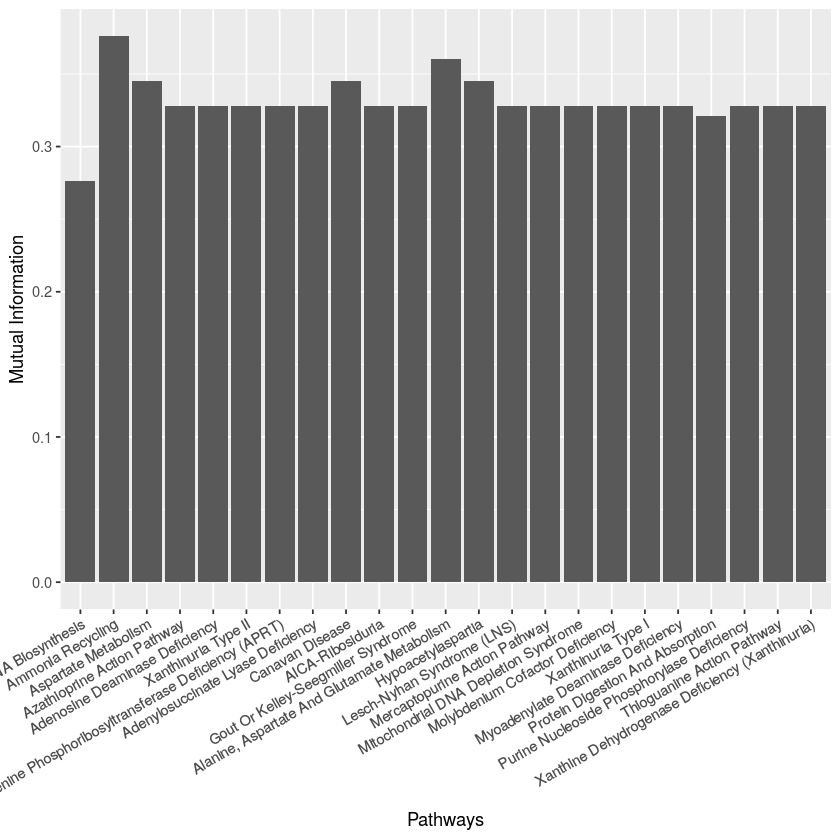

In [30]:
selected_Pathways_Weka= featuresSelection(PDSmatrix,threshold=0.5,method="info")
selected_Pathways_Weka

## V- Classification and prediction 
### This function will randomly separate the PDS score matrix with only the selected pathways into training and testing sets. It will use seven widely used machine learning algorithms to build the classification model from the training set. It plots the pathway importance from each model and its accuracy (AUC, sensitivity, specificity). 

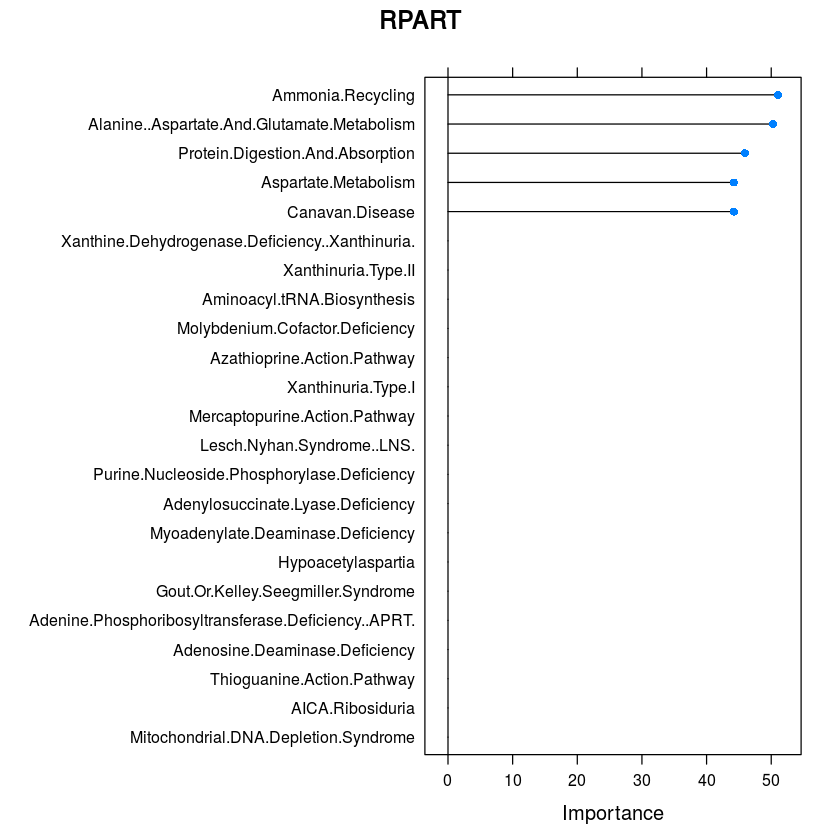

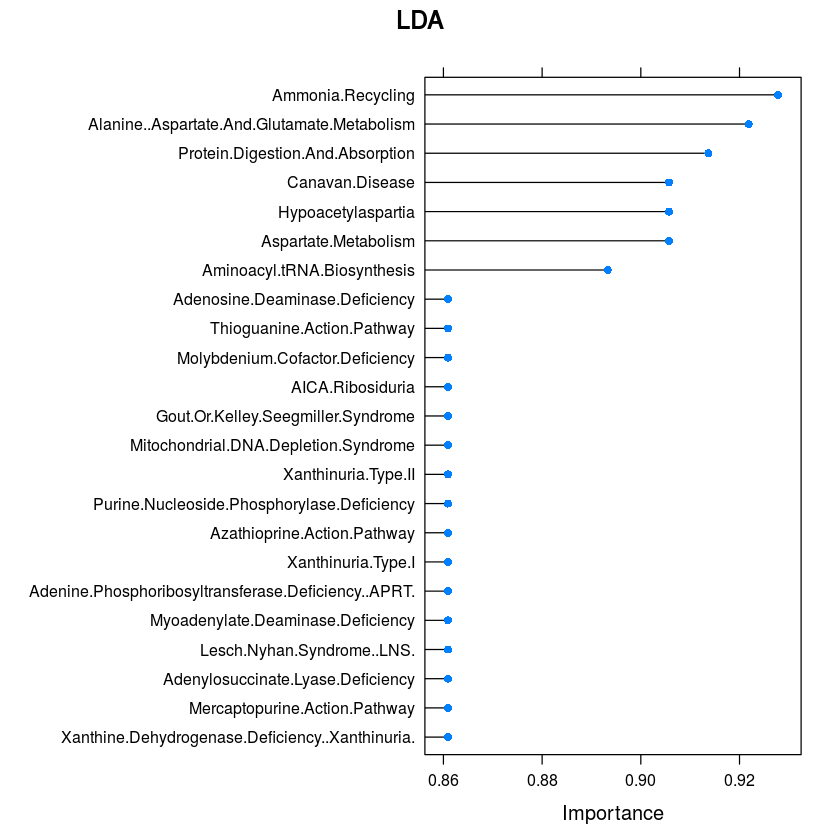

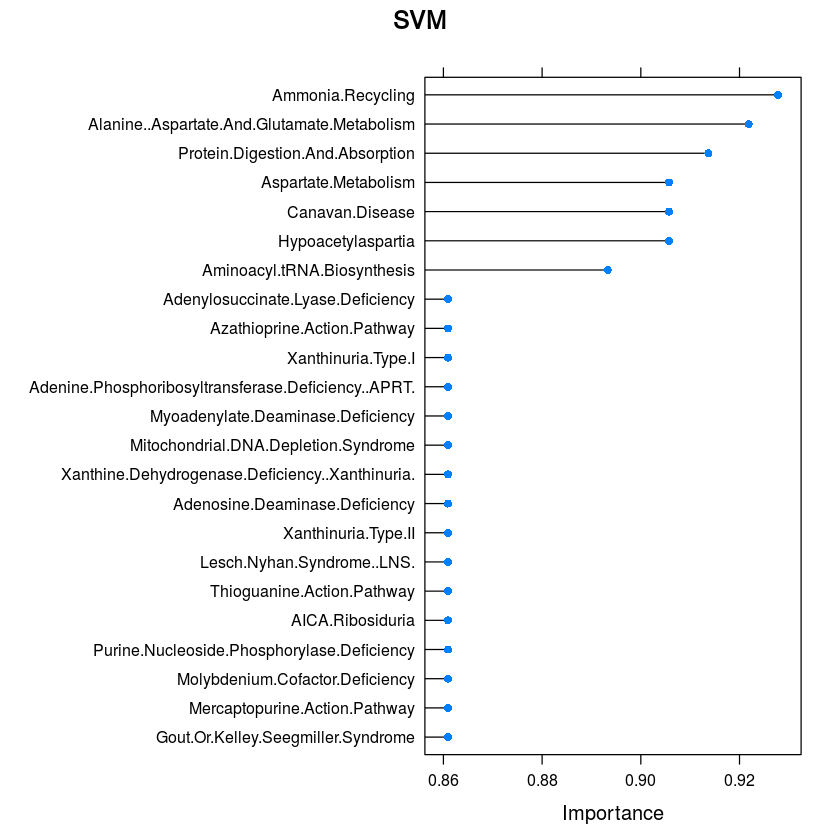

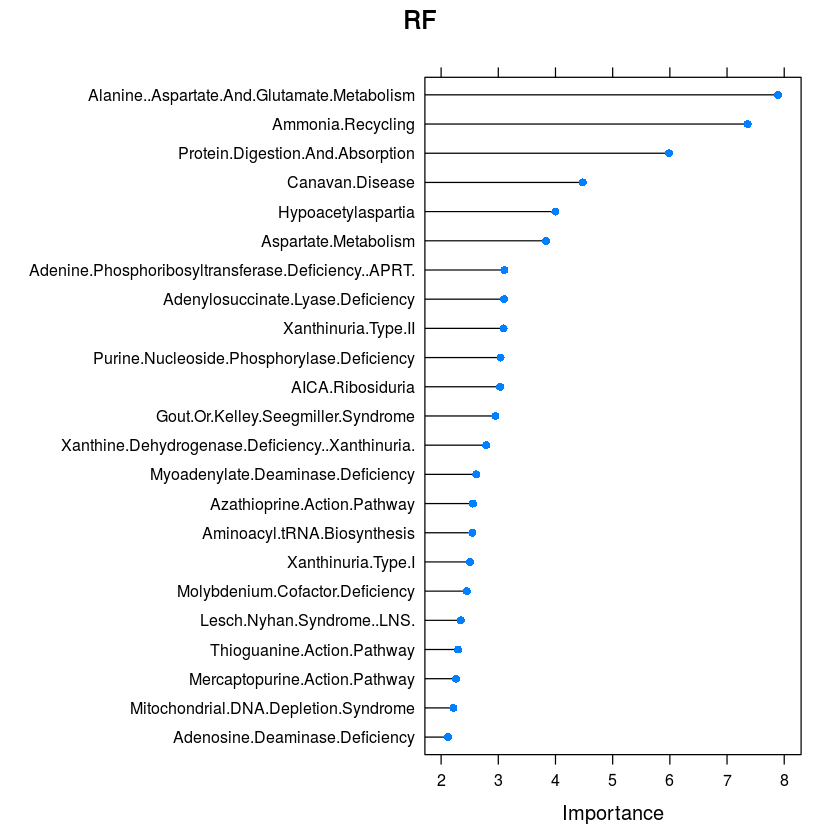

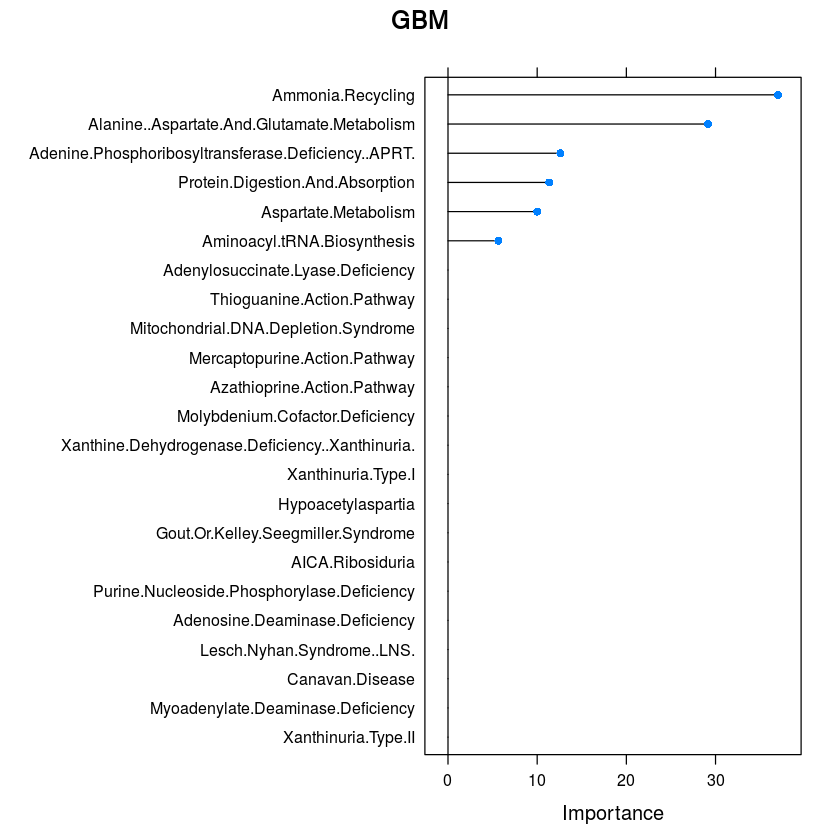

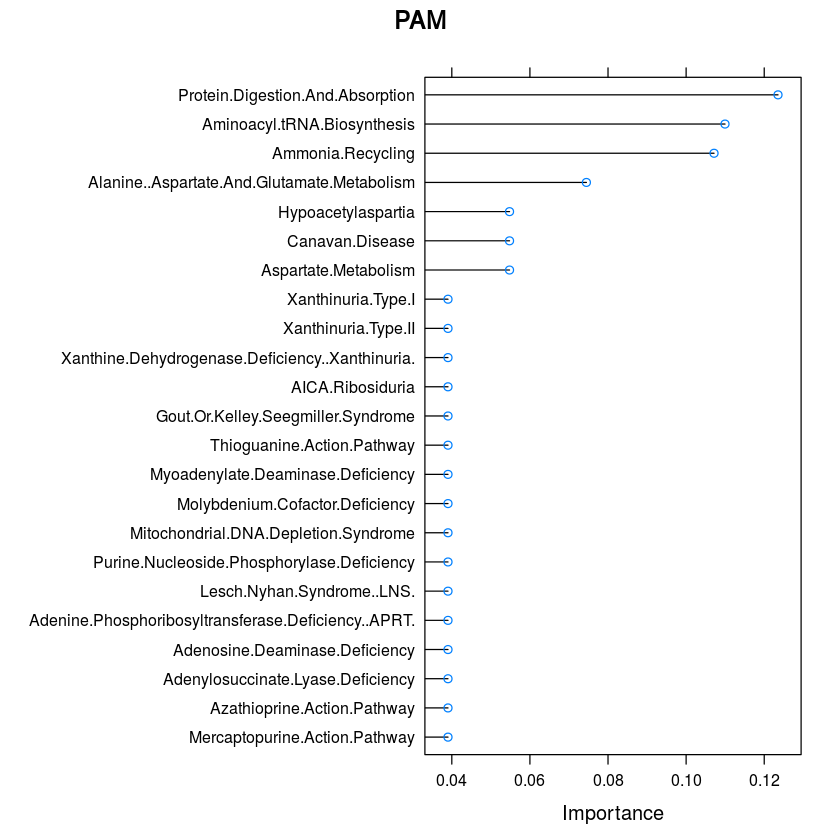

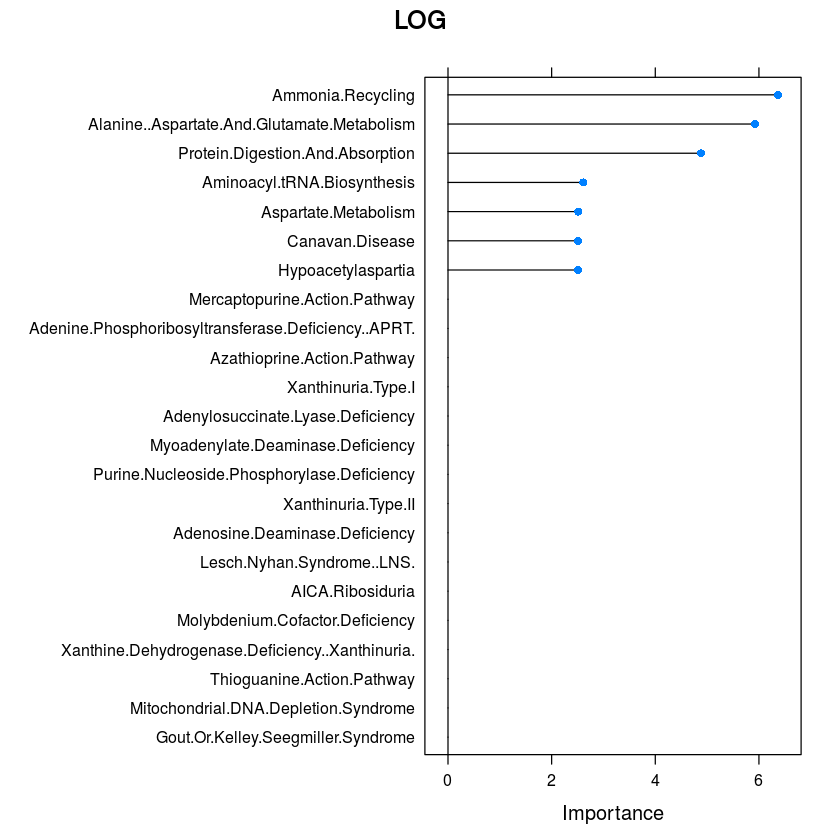

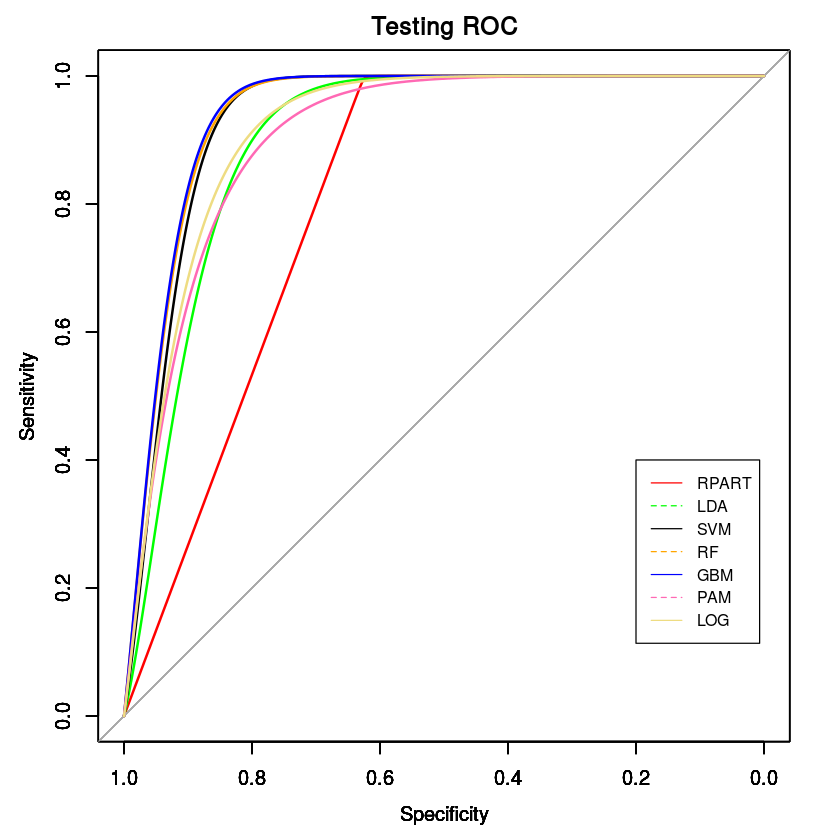

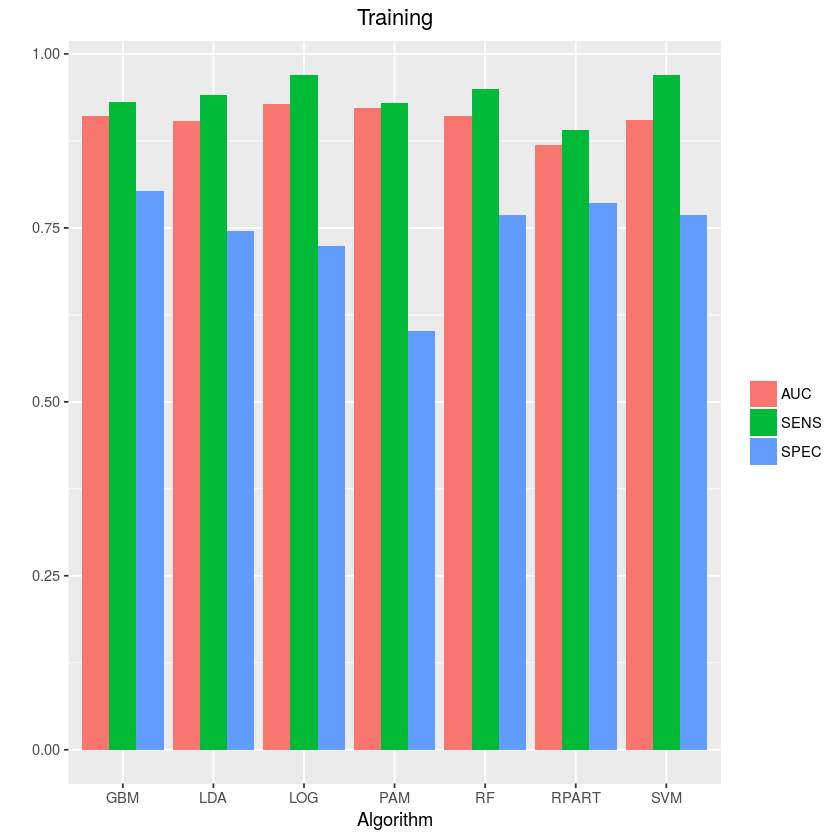

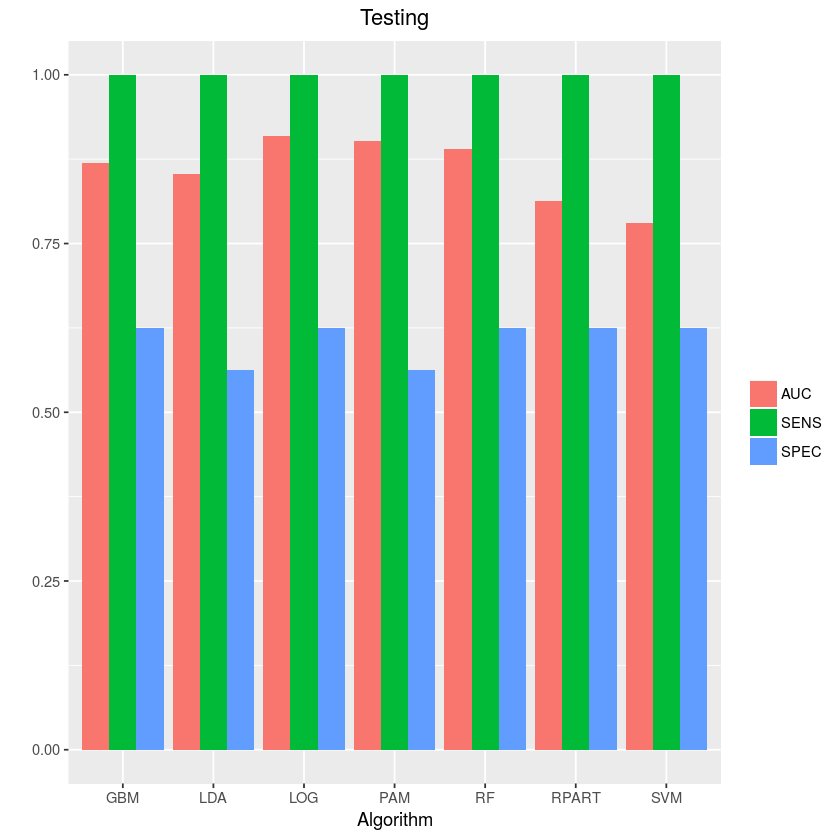

In [39]:
machine_learning(PDSmatrix,selected_Pathways_Weka);